In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

dataset = pd.read_csv('task_3a_sample_data.csv', delimiter = '\t')

for col in ['public_id','title','text', 'our rating']: 
    dataset[col] = dataset[col].astype('category')

dataset = pd.get_dummies(data=dataset,columns=['public_id','title','text'])
labelencoder = LabelEncoder() 
dataset['our rating'] = labelencoder.fit_transform(dataset['our rating'])

X=dataset.drop(columns=['our rating']) 
y=dataset['our rating']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2) 

knn=KNeighborsClassifier() 
knn.fit(X_train,y_train)

predictions=knn.predict(X_test)

score=accuracy_score(y_test, predictions)
score

#print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train,y_train))) 
#print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test,y_test)))


0.4

In [4]:
prediction=knn.predict(X_test)

report = classification_report(y_test,prediction,output_dict=True)
report
#prediction

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 3},
 '2': {'precision': 0.4,
  'recall': 1.0,
  'f1-score': 0.5714285714285715,
  'support': 4},
 'accuracy': 0.4,
 'macro avg': {'precision': 0.13333333333333333,
  'recall': 0.3333333333333333,
  'f1-score': 0.1904761904761905,
  'support': 10},
 'weighted avg': {'precision': 0.16,
  'recall': 0.4,
  'f1-score': 0.2285714285714286,
  'support': 10}}

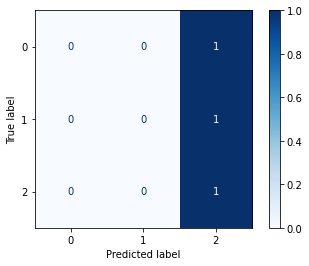

In [5]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues, normalize='true')